**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [ ]:
from sklearn.datasets import load_breast_cancer

frame = load_breast_cancer(as_frame=True)
df = frame['data']
X = df.values
y = np.array(frame['target'])

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Partitioning

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train.T[0].reshape(-1,1), y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = clf.predict(X_test.T[0].reshape(-1,1))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8830409356725146
F1-score [0.84126984 0.90740741]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84        69
           1       0.86      0.96      0.91       102

    accuracy                           0.88       171
   macro avg       0.89      0.86      0.87       171
weighted avg       0.89      0.88      0.88       171



In [ ]:
clf.intercept_

array([0.79171574])

In [ ]:
clf.coef_

array([[-3.26503457]])

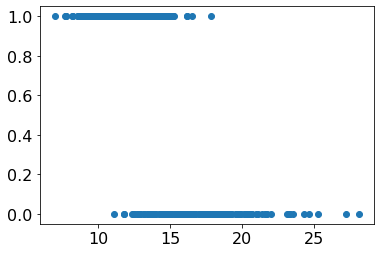

In [ ]:
plt.scatter(X_train.T[0], y_train)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
from scipy.special import expit

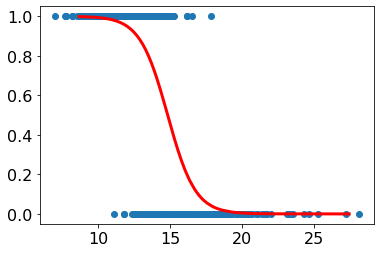

In [ ]:
loss = expit(sorted(X_test.T[0].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_train.T[0].reshape(-1,1), y_train)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Example Slides

In [ ]:
hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 
                  2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 
                  4.50, 4.75, 5.00, 5.50]).reshape(-1, 1)
exam_passed = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(hours, exam_passed.ravel())

LogisticRegression(random_state=0)

In [ ]:
print(clf.coef_)
print(clf.intercept_)

[[1.14860386]]
[-3.13952411]


In [ ]:
clf.predict(np.array([2.5, 8.0]).reshape(-1,1))

array([0, 1])

In [ ]:
clf.predict_proba(np.array([2.5, 8.0]).reshape(-1,1))

array([[0.56660539, 0.43339461],
       [0.00235394, 0.99764606]])

In [ ]:
def proba(x, beta0, beta1):
    return 1/(1+np.e**(-(beta1 * x + beta0)))

In [ ]:
proba(0, clf.intercept_[0], clf.coef_[0][0])

0.041506047760321435

In [ ]:
proba(2.5, clf.intercept_[0], clf.coef_[0][0])

0.43339461054552814

In [ ]:
proba(8, clf.intercept_[0], clf.coef_[0][0])

0.9976460571014075

In [ ]:
x = 1

In [ ]:
print('Log-odds of passing exam', clf.coef_[0][0] * x + clf.intercept_[0])
print('Odds of passing exam', np.e**(clf.coef_[0][0] * x + clf.intercept_[0]))

Log-odds of passing exam -1.9909202424586012
Odds of passing exam 0.13656969037338149


In [ ]:
proba(0.5, clf.intercept_[0], clf.coef_[0][0])

0.07141047851885024

In [ ]:
proba(1, clf.intercept_[0], clf.coef_[0][0])

0.12015953929628034

In [ ]:
proba(2, clf.intercept_[0], clf.coef_[0][0])

0.30104715244294333

In [ ]:
proba(3, clf.intercept_[0], clf.coef_[0][0])

0.5759788210742368

In [ ]:
np.e**(clf.coef_[0][0])

3.1537867213478545

In [ ]:
proba(2, -4.0777, 1.5046)

0.25568844734059615

In [ ]:
proba(3, -4.0777, 1.5046)

0.6073293474722868

In [ ]:
proba(4, -4.0777, 1.5046)

0.8744290256656763

In [ ]:
np.e**1.5046

4.502352329120619

In [ ]:
np.e**(1.5046 * 3 -4.0777)/np.e**(1.5046 * 2 -4.0777)

4.502352329120619

In [ ]:
np.e**(1.5046 * 4 -4.0777)/np.e**(1.5046 * 3 -4.0777)

4.502352329120619

In [ ]:
np.e**(1.5046 * 5 -4.0777)/np.e**(1.5046 * 4 -4.0777)

4.502352329120619

In [ ]:
np.e**(1.5046 * 4 -4.0777)/np.e**(1.5046 * 2 -4.0777)

20.271176495537862

In [ ]:
np.e**1.5046 * np.e**1.5046

20.271176495537862

In [ ]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(clf.intercept_)
print(clf.coef_)

[0.70015145]
[[-0.26098956 -0.52408365 -0.28161444 -0.31809929 -0.26232303  0.42984442
  -0.74246578 -0.79506069  0.14841157  0.27016451 -1.18666183  0.0095914
  -0.78485175 -0.91026719 -0.20889238  1.05911942  0.18044777 -0.66190024
  -0.00211281  0.63988074 -0.80435742 -0.9721553  -0.77049094 -0.78497207
  -0.71863499  0.02580828 -0.70958963 -1.01302527 -0.45276347 -0.56840863]]


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        63
           1       1.00      0.94      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

